In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
train = pd.read_csv("titanic_all/train.csv")
train.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
train.Embarked = train["Embarked"].replace(["C","S","Q"], [0,1,2])
train.Sex = train.Sex.replace(["male","female"], [0,1])
train.Age = train.Age.replace("NaN", 0)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


# 基礎集計

In [4]:
corrmat = train.corr()
corrmat

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.126753
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.307324
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.023175
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.042340
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.031095
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.035756
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.269588
Embarked,-0.126753,0.307324,-0.023175,-0.042340,0.031095,-0.035756,-0.269588,1.000000


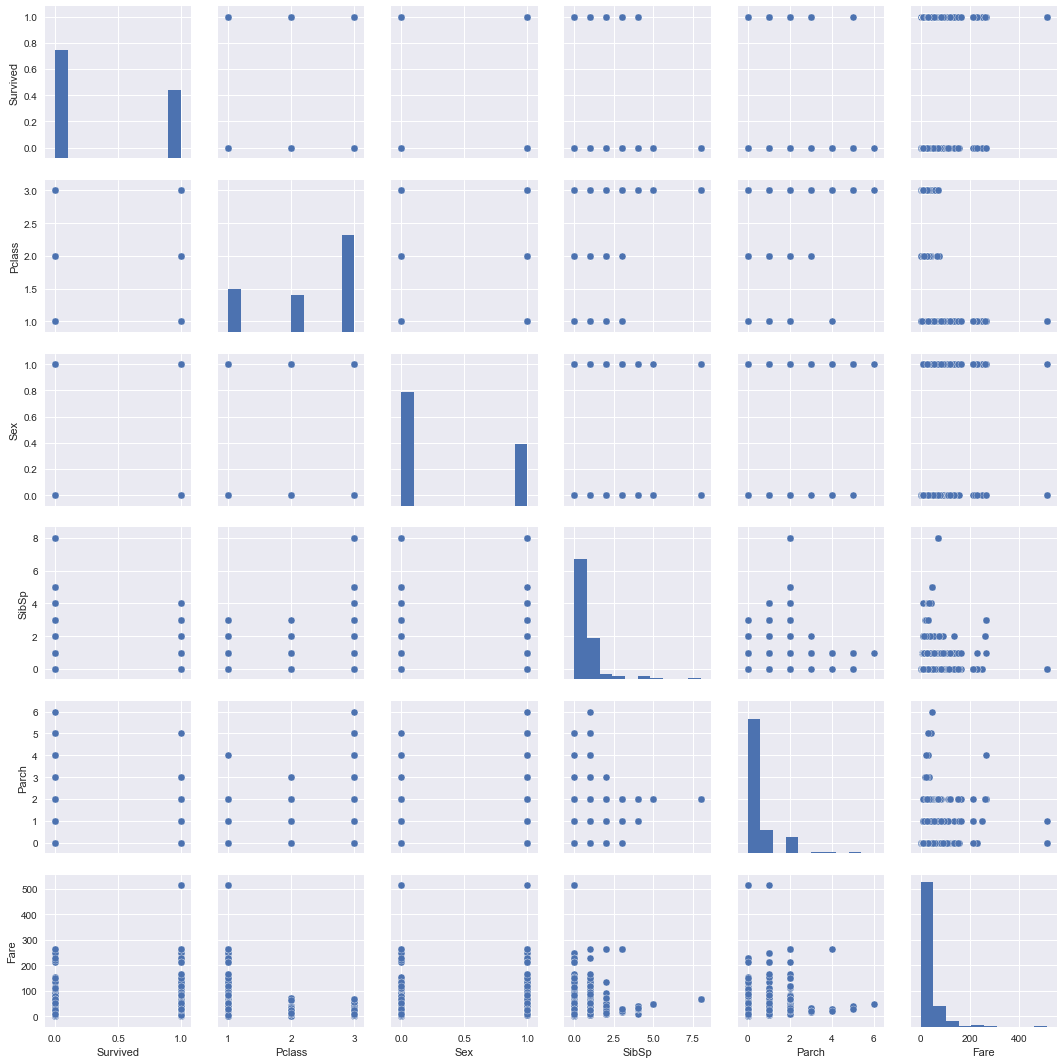

In [5]:
sns.set()
cols = ["Survived","Pclass","Sex","SibSp","Parch","Fare"]
sns.pairplot(train[cols],size=2.5)
plt.show()

In [6]:
train_labels = train["Survived"].values
train_features = train
train_features.drop("Survived",axis = 1, inplace=True)
train_features = train_features.values.astype(np.int64)

In [7]:
from sklearn import svm

svm = svm.LinearSVC()
svm.fit(train_features, train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [14]:
test = pd.read_csv("titanic_all/test.csv")
test.drop(["PassengerId","Name","Ticket","Cabin"],axis = 1,inplace=True)

test.Embarked = test.Embarked.replace(["C","S","Q"],[0,1,2])
test.Sex = test["Sex"].replace(["male","female"],[0,1])
test.Age = test.Age.replace("NaN",0)

test_features = test.values.astype(np.int64)

y_test_pre = svm.predict(test_features)
df_out = pd.read_csv("titanic_all/test.csv")
df_out["Survived"] = y_test_pre

df_out[["PassengerId","Survived"]].to_csv("submission.csv",index=False)